In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)

inputdir <- "./load_files/"
outputdir <- "./report/"

seu <- readRDS(file = paste0("../overview/load_files/", "PAT_inte.organizer.inte.rds"))
seu <- seu[, !seu@meta.data$subtype %in% "PC SFRP1"]

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




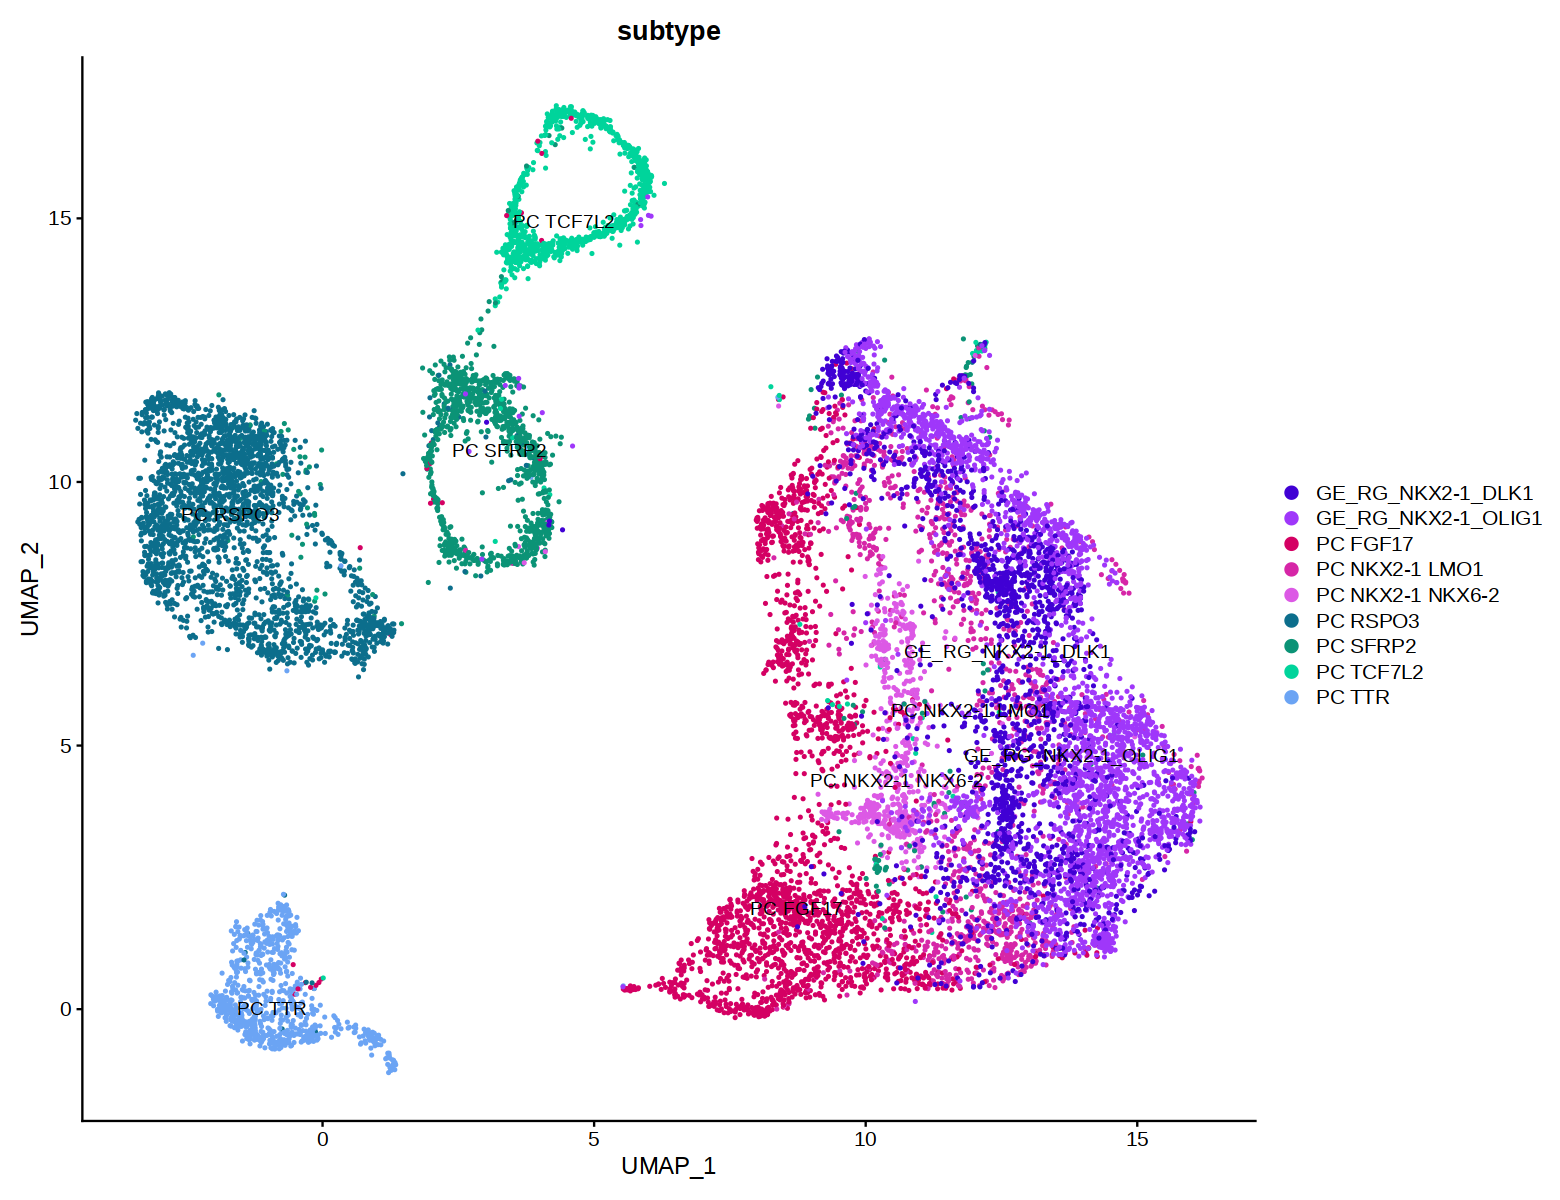

In [2]:
cls_cols <- list(subtype = c("#d40063", "#d626a7", "#dc59e5", "#8b3cc4", 
                             "#0c6e8c", "#6ba4f4", "#0b9376", "#00d49b", 
                             "#4000d4", "#9f37fa") %>% 
                 setNames(., c("PC FGF17", "PC NKX2-1 LMO1", "PC NKX2-1 NKX6-2", "PC SFRP1", 
                               "PC RSPO3", "PC TTR", "PC SFRP2", "PC TCF7L2", 
                               "GE_RG_NKX2-1_DLK1", "GE_RG_NKX2-1_OLIG1")),
                subclass = c("#db233e", "#fc199d", "#8b3cc4", 
                             "#0c6e8c", "#6ba4f4", "#0b9376", "#b3e209", "#f9c73e") %>%
                setNames(., c("PC FGF17", "PC NKX2-1", "PC SFRP1", 
                              "PC RSPO3", "PC TTR", "PC SFRP2", "PC TCF7L2", "GE_NE_NKX2-1")))
p <- DimPlot(seu, group.by = "subtype", cols = cls_cols$subtype, pt.size = 0.4, label = TRUE)
options(repr.plot.width=13, repr.plot.height=10, res = 300)
p


In [3]:
## Meta data visaulization
meta <- readRDS(file = paste0("../../MF1/overview/load_files/Reanno_E37-110.org.meta.10052022.rds"))

sel_cls <- c("PC FGF17", "AntVen NKX2-1 NKX6-2", "AntVen NKX2-1 LMO1", 
             "GE RG NKX2-1 DLK1", "GE RG NKX2-1 OLIG1", 
             "PC RSPO3", "PC TTR", "PC SFRP2", "PC TCF7L2")
fmeta <- subset(meta, subtype %in% sel_cls)
sum(sel_cls %in% fmeta$subtype) == length(sel_cls)

##fmeta <- subset(meta, subtype %in% sel_cls)

[1] TRUE

`summarise()` has grouped output by 'subtype'. You can override using the
`.groups` argument.
Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation ideoms with `aes()`”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
`summarise()` has grouped output by 'subtype'. You can override using the
`.groups` argument.


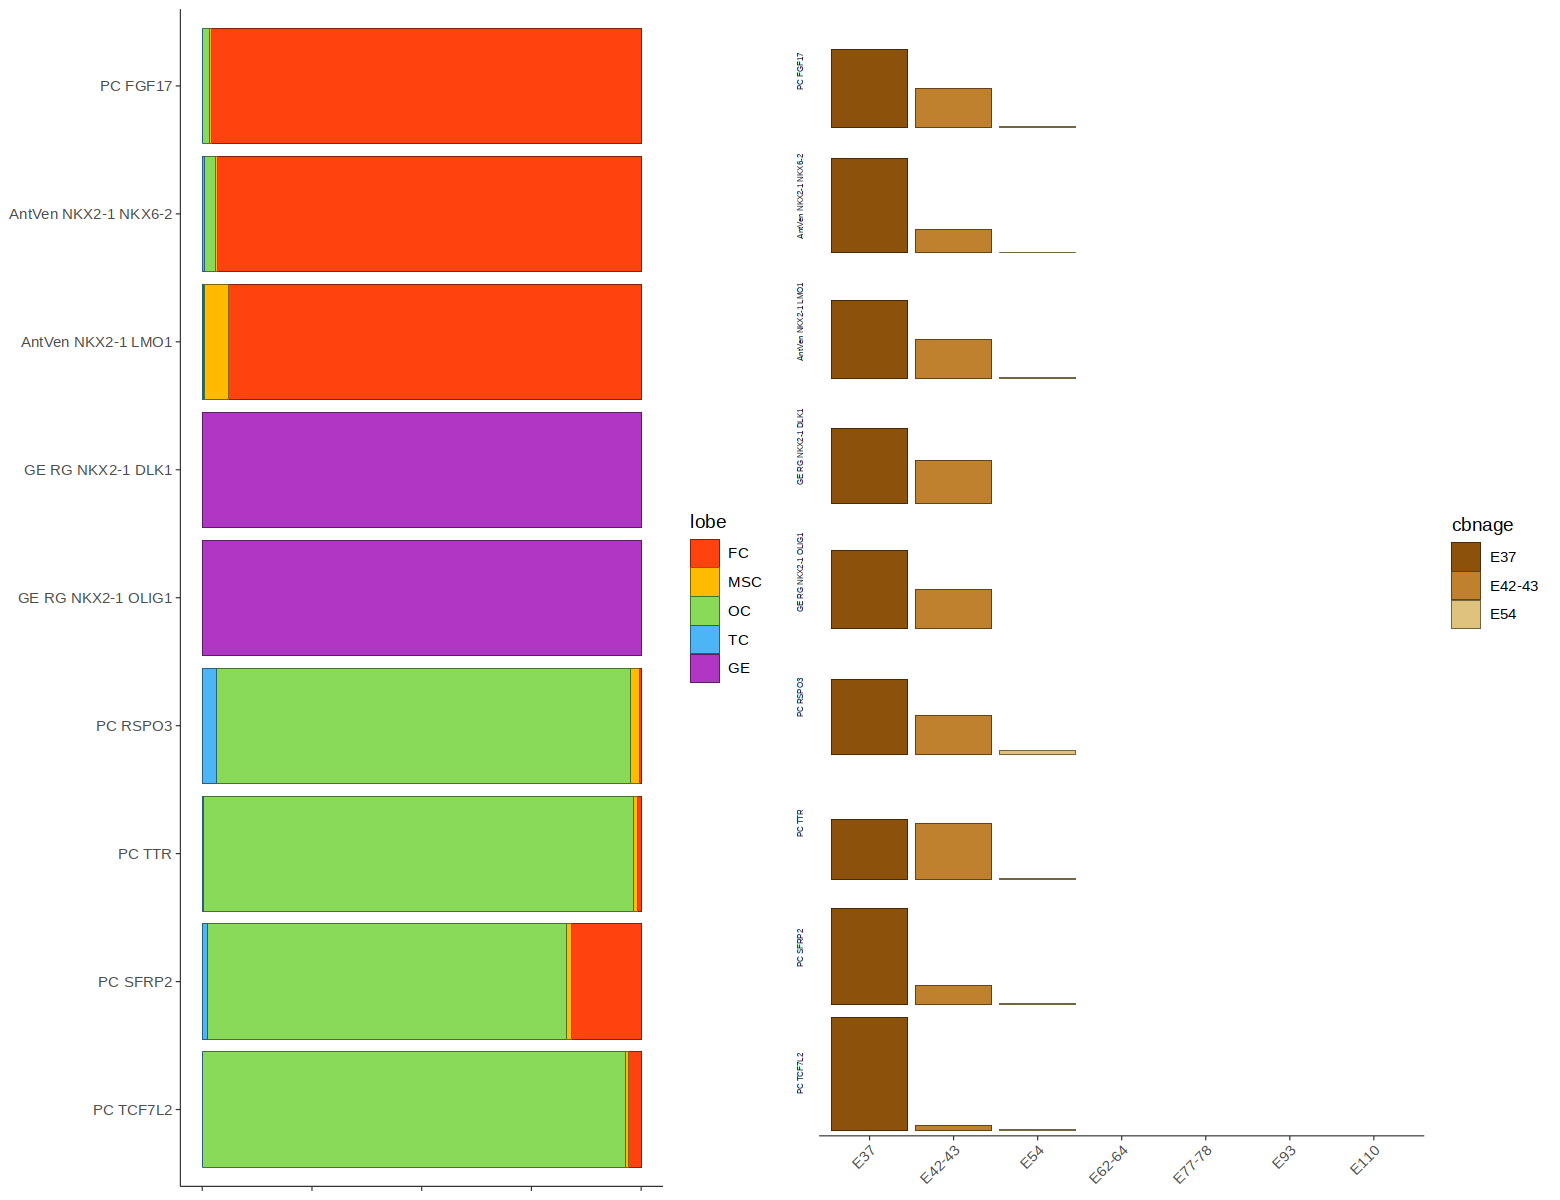

In [4]:
split.by <- "lobe"
reg_cols <- c("#FF420E", "#FFBB00", "#4CB5F5", "#89DA59", "#878787", "#B037C4") %>% 
                setNames(., c("FC", "MSC", "TC", "OC", "Insula", "GE"))
age_cols <- c("#8c510a", "#bf812d", "#dfc27d", "#c7eae5", "#80cdc1", "#35978f", "#01665e") %>% 
                setNames(., c("E37", "E42-43", "E54", "E62-64", "E77-78", "E93", "E110"))



split.by <- "lobe"
p1_data <- fmeta %>%
                group_by(subtype, !!sym(split.by)) %>%
                summarize(size = n()) %>%
                ungroup() %>% 
                group_by(subtype) %>%
                mutate(size = size * 100/sum(size)) %>%
                ungroup() %>%
                mutate(subtype = factor(subtype, levels = rev(sel_cls))) %>%
                mutate(!!sym(split.by) := factor(!!sym(split.by), 
                            levels = switch(split.by, 
                                            lobe = c("FC", "MSC", "OC", "TC", "GE"), 
                                            cbnage = c("E37", "E42-43", "E54"))))


p1 <- ggplot(p1_data, aes_string(x = "size", y = "subtype", fill = "lobe")) +
                geom_bar(color = "black", position = position_stack(reverse = FALSE), stat = "identity", lwd = 0.1) +
                ##lemon::coord_capped_cart(bottom='both', left='both') +
                scale_fill_manual(values = reg_cols) +
                theme_classic() + 
                labs(y = "Cluster", x = "Sample Ratio") +
                theme(axis.line=element_line(size = 0.2), 
                      axis.ticks=element_line(size = 0.25), 
                      axis.text.x = element_blank(), axis.title = element_blank())


split.by <- "cbnage"
p2_data <- fmeta %>%
                group_by(subtype, !!sym(split.by)) %>%
                summarize(size = n()) %>%
                ungroup() %>% 
                group_by(subtype) %>%
                mutate(size = size * 100/sum(size)) %>%
                ungroup() %>%
                mutate(subtype = factor(subtype, levels = sel_cls)) %>%
                mutate(!!sym(split.by) := factor(!!sym(split.by), 
                                                levels = switch(split.by, 
                                                                lobe = c("FC", "MSC", "OC", "TC", "GE"), 
                                                                cbnage = c("E37", "E42-43", "E54"))))


p2 <- ggplot(p2_data, aes_string(x = "cbnage", y = "size", fill = "cbnage")) +
                geom_bar(color = "black", stat = "identity", lwd = 0.1) +
                ##lemon::coord_capped_cart(bottom='both', left='both') +
                scale_fill_manual(values = age_cols) +
                theme_classic() + 
                labs(y = "Cluster", x = "Sample Ratio") +
                scale_x_discrete(limits = names(age_cols)) +
                ##RotatedAxis() + 
                facet_wrap(vars(subtype), nrow = length(sel_cls), ncol = 1, strip.position = "left") +
                theme(strip.background = element_blank(), 
                    strip.placement = "outside", panel.spacing = unit(0.01, "in"), 
                    axis.line.x=element_line(size = 0.2), axis.line.y=element_blank(), 
                    axis.ticks.x=element_line(size = 0.25), axis.ticks.y=element_blank(), 
                    axis.text.x = element_text(size = rel(1), angle = 45, hjust = 1), axis.text.y = element_blank(), 
                    axis.title = element_blank(),
                    strip.text.y.left = element_text(size = rel(0.5)))

pcbn <- cowplot::plot_grid(p1, p2, nrow = 1, ncol = 2)
pcbn

In [5]:
pdf(paste0("./report/", "PAT_organizer_age_region_contribution_v2.pdf"), width = 6, height = 6)
cowplot::plot_grid(p1, p2, nrow = 1, ncol = 2)  %>% print()##print(p2)
dev.off()

png 
  2

In [6]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS/LAPACK: /gpfs/gibbs/pi/sestan.ycga/sm2726/conda_envs/scmultiome/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_3.4.1      dplyr_1.1.0        SeuratObject_4.1.3 Seurat_4.3.0      

loaded via a namespace (and not attached):
  [1] Rtsne_0.16             colorspace_2.1-0       deldir_1.0-6          
  [4] ellipsis_0.3.2         ggridges_0.5.4         IRdispla